/var/folders/yl/gn9fldpj69169vhn466y4klh0000gn/T/ipykernel_13955/3809940409.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix_data = yf.download(vix_ticker, start=start_date, end=end_date)['Close'].dropna()
[*********************100%***********************]  1 of 1 completed

Download complete.
Generating plot...


<Figure size 1200x600 with 0 Axes>

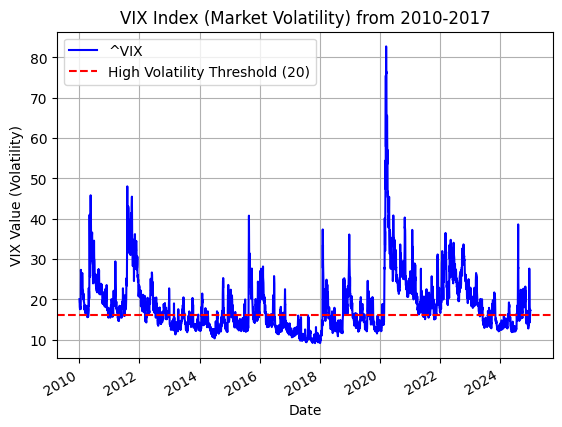

Plot generation complete.


In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the ticker for VIX and the date range
vix_ticker = '^VIX'
start_date = '2010-01-01'
# We set the end date to the start of 2018 to get all of 2017
end_date = '2025-01-01' 

# Download the VIX data from Yahoo Finance
# We only need the 'Adj Close' column, which holds the VIX value
print(f"Downloading VIX data from {start_date} to {end_date}...")
vix_data = yf.download(vix_ticker, start=start_date, end=end_date)['Close'].dropna()
print("Download complete.")

# --- Plotting the Graph ---
print("Generating plot...")
plt.figure(figsize=(12, 6))
vix_data.plot(label='VIX Index ("Fear Index")', color='blue')

# Add a horizontal line at 20, a common threshold for high/low volatility
plt.axhline(16, color='red', linestyle='--', label='High Volatility Threshold (20)')

# Add titles and labels to make the chart easy to read
plt.title('VIX Index (Market Volatility) from 2010-2017')
plt.xlabel('Date')
plt.ylabel('VIX Value (Volatility)')
plt.legend()

plt.grid(True)

# Show the plot
plt.show()
print("Plot generation complete.")


/var/folders/yl/gn9fldpj69169vhn466y4klh0000gn/T/ipykernel_41835/3675716535.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download([spy_ticker, vix_ticker], start=start_date, end=end_date)['Close']
[*********************100%***********************]  2 of 2 completed

Download complete.
Generating plot...


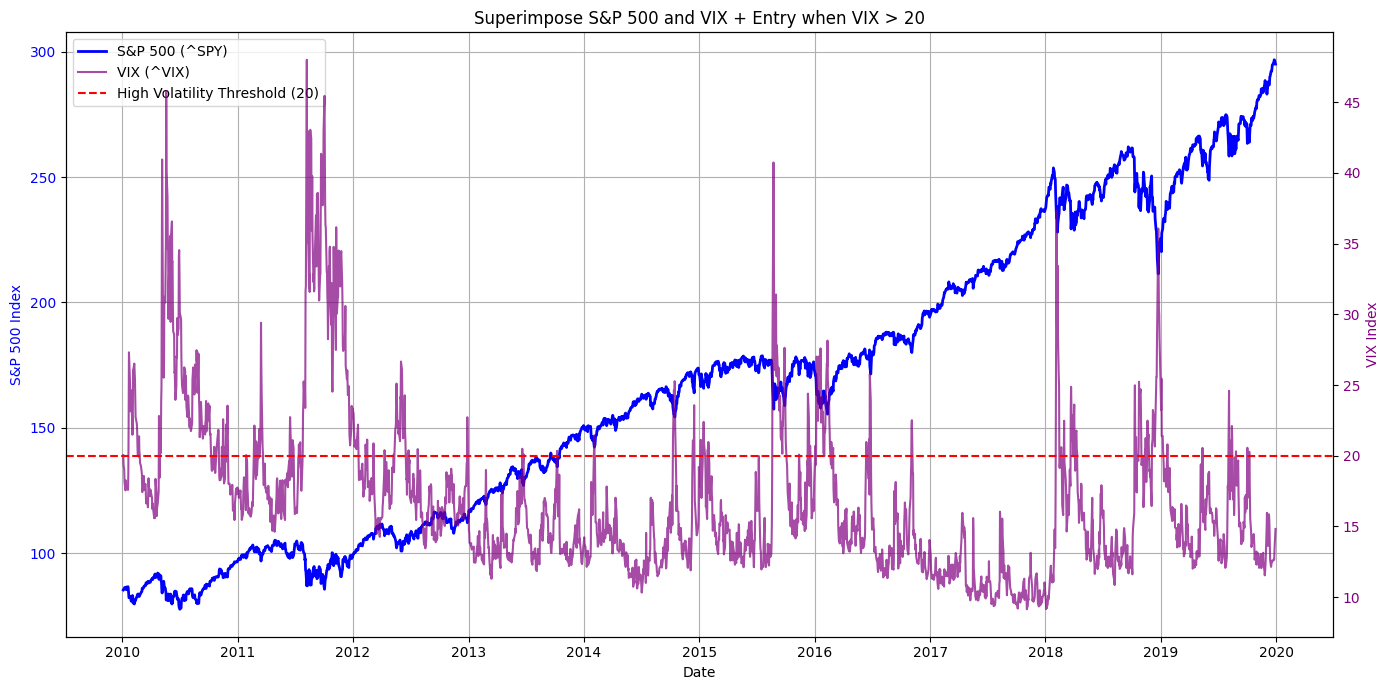

Plot generation complete.


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define tickers and date range
vix_ticker = '^VIX'
spy_ticker = 'SPY' # S&P 500 index ticker from the image
start_date = '2010-01-01' # Updated start date to match the image's timeline
end_date = '2019-12-31'
threshold = 20 # Threshold from the image ("VIX > 30")

# Download data for both tickers at once
print(f"Downloading data for {spy_ticker} and {vix_ticker} from {start_date} to {end_date}...")
# Download 'Close' price for both
data = yf.download([spy_ticker, vix_ticker], start=start_date, end=end_date)['Close']
# Rename columns for easier access
data.columns = ['SPY', 'VIX']
# Drop any rows where we might be missing data for one of the tickers
data = data.dropna()
print("Download complete.")

# --- Identify Buy Signals ---
# Create a boolean Series: True where VIX > threshold, False otherwise
buy_signals = data['VIX'] > threshold
# Get the S&P 500 price points ONLY on the days when the signal is True
# This will be NaN on all other days
spy_buy_points = data['SPY'][buy_signals]

# --- Plotting the Graph ---
print("Generating plot...")
# Create a figure and a primary Y-axis (ax1)
fig, ax1 = plt.subplots(figsize=(14, 7)) # Larger figure size for clarity

# --- Plot S&P 500 (Left Y-Axis) ---
color = 'blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500 Index', color=color)
ax1.plot(data.index, data['SPY'], color=color, label='S&P 500 (^SPY)', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)

# --- Plot the "Buy Signal" dots on the S&P 500 axis (ax1) ---
# ax1.plot(spy_buy_points.index, spy_buy_points, 'go', label=f'Buy Signal (VIX > {threshold})', markersize=6)

# --- Create and Plot VIX (Right Y-Axis) ---
# Create a second Y-axis (ax2) that shares the same X-axis
ax2 = ax1.twinx()
color = 'purple'
ax2.set_ylabel('VIX Index', color=color)
ax2.plot(data.index, data['VIX'], color=color, label='VIX (^VIX)', alpha=0.7, linewidth=1.5)
ax2.tick_params(axis='y', labelcolor=color)
ax2.axhline(20, color='red', linestyle='--', label='High Volatility Threshold (20)')

# --- Final Touches ---
# Add title and grid
plt.title(f'S&P 500 and VIX')
ax1.grid(True) # Add gridlines

# Combine legends from both axes (ax1 and ax2) into one box
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust layout to prevent labels from overlapping
fig.tight_layout()

# Show the plot
plt.show()
print("Plot generation complete.")

/var/folders/yl/gn9fldpj69169vhn466y4klh0000gn/T/ipykernel_41835/2283552362.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spx_data = yf.download('^GSPC', start=start_date, end=end_date)['Close'].dropna()
[*********************100%***********************]  1 of 1 completed

Fitting Markov model...



/Users/justiny/Documents/backtest/myenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/var/folders/yl/gn9fldpj69169vhn466y4klh0000gn/T/ipykernel_41835/2283552362.py:35: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix_data = yf.download(vix_ticker, start=start_date, end=end_date)['Close'].dropna()
[*********************100%***********************]  1 of 1 completed

Markov model complete.
Generating combined plot...


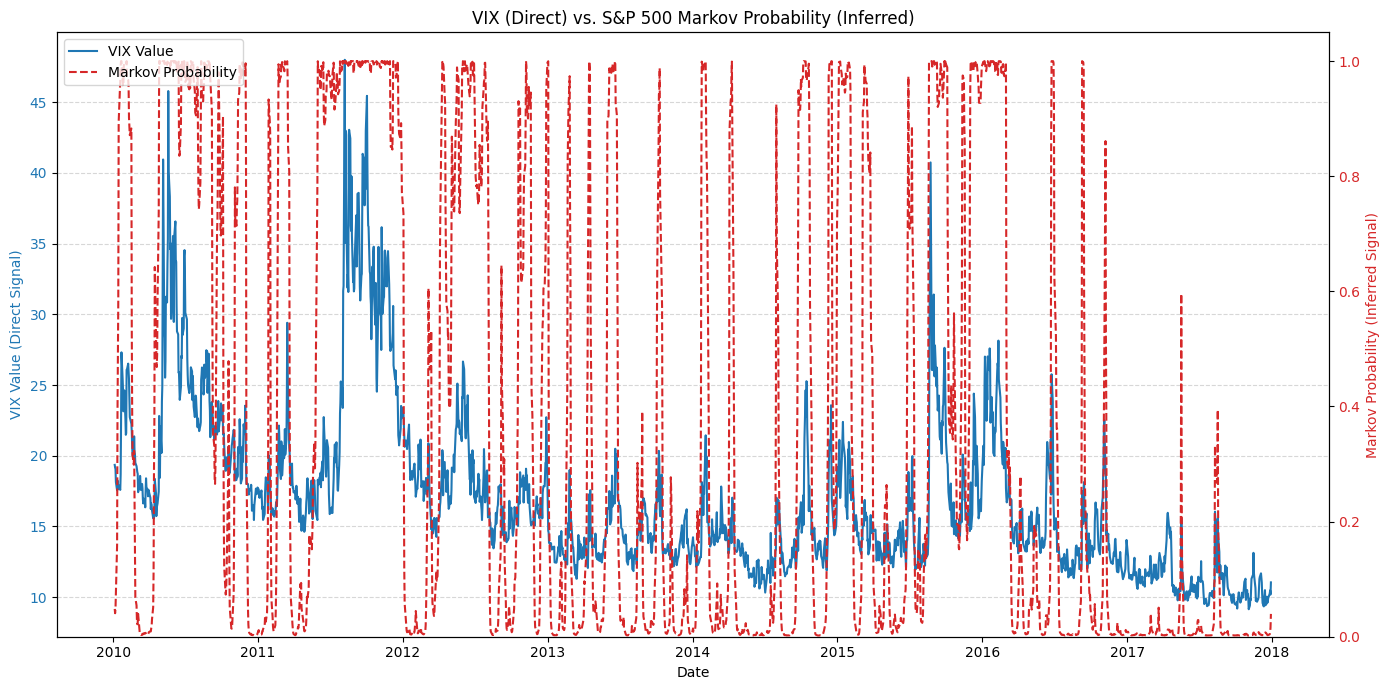

Plot generation complete.


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# --- 1. Calculate Markov Probability from S&P 500 Returns ---
start_date = '2010-01-01'
end_date = '2018-01-01'

# Download S&P 500 data
print("Downloading S&P 500 data for Markov model...")
spx_data = yf.download('^GSPC', start=start_date, end=end_date)['Close'].dropna()
# Calculate returns
returns = np.log(spx_data / spx_data.shift(1)).dropna()

# Fit a 2-regime Markov Switching Model
print("Fitting Markov model...")
model = MarkovRegression(returns, k_regimes=2, trend='c', switching_variance=True)
result = model.fit()

# Identify which regime is the high-volatility one
if result.params['sigma2[0]'] > result.params['sigma2[1]']:
    high_vol_regime = 0
else:
    high_vol_regime = 1

# Get the probability series
probability = result.smoothed_marginal_probabilities[high_vol_regime]
print("Markov model complete.")

# --- 2. Get VIX Data (from your code) ---
print("Downloading VIX data...")
vix_ticker = '^VIX'
vix_data = yf.download(vix_ticker, start=start_date, end=end_date)['Close'].dropna()

# --- 3. Align Data and Plot ---
# We align the VIX data to the probability index, as the 'returns' calculation
# makes the probability series one day shorter.
vix_data_aligned = vix_data.reindex(probability.index)

print("Generating combined plot...")
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot 1: VIX on the left Y-axis (ax1)
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('VIX Value (Direct Signal)', color=color)
ax1.plot(vix_data_aligned, color=color, label='VIX Value')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, which='major', axis='y', linestyle='--', alpha=0.5)

# Create a second Y-axis (ax2) that shares the same X-axis
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Markov Probability (Inferred Signal)', color=color)  
ax2.plot(probability, color=color, label='Markov Probability', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)
# Set the probability axis to be strictly 0 to 1
ax2.set_ylim(0, 1.05) 

# Add a combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('VIX (Direct) vs. S&P 500 Markov Probability (Inferred)')
fig.tight_layout()  # Adjust plot to prevent labels from overlapping
plt.show()
print("Plot generation complete.")

/var/folders/yl/gn9fldpj69169vhn466y4klh0000gn/T/ipykernel_13955/983537642.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  all_data = yf.download(tickers, start=start_date, end=end_date)['Close'].dropna()
[                       0%                       ]

[*********************100%***********************]  10 of 10 completed

Download complete.
Fitting Markov Switching Model to your custom portfolio...



/Users/justiny/Documents/backtest/myenv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model fit complete.
Regime 1 identified as the High Volatility regime.


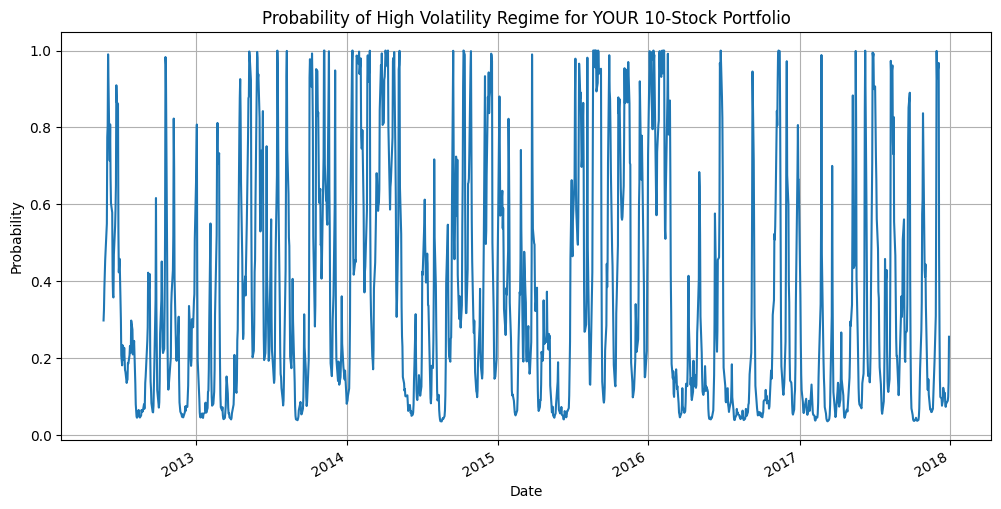

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# 1. DOWNLOAD DATA FOR YOUR 10 STOCKS
tickers = ['NVDA','AAPL', 'MSFT', 'AMZN', 'META', 'AVGO', 'GOOGL', 'TSLA', 'GOOG', 'BRK-B']
start_date = '2010-01-01'
end_date = '2017-12-30' # Use a recent date

print("Downloading data for all 10 stocks...")
all_data = yf.download(tickers, start=start_date, end=end_date)['Close'].dropna()
print("Download complete.")

# 2. CREATE AN EQUAL-WEIGHTED PORTFOLIO INDEX
# We normalize each stock to a $1 starting price
normalized_data = all_data / all_data.iloc[0]
# We sum the performance of all 10 stocks (since they are equal-weighted)
portfolio_value = normalized_data.sum(axis=1)

# 3. CALCULATE THE PORTFOLIO'S LOG RETURNS
# This is the single time series we will feed into the model
portfolio_returns = np.log(portfolio_value / portfolio_value.shift(1)).dropna()

print("Fitting Markov Switching Model to your custom portfolio...")
# 4. FIT THE MARKOV MODEL
# We use the *exact same* model as before, but on our new returns
model = MarkovRegression(portfolio_returns, 
                         k_regimes=2, 
                         trend='c', 
                         switching_variance=True)

result = model.fit()
print("Model fit complete.")

# 5. PLOT THE PROBABILITY OF THE HIGH-VOLATILITY REGIME
# The model will figure out which regime (0 or 1) has higher volatility
# Let's check which one it is
if result.params['sigma2[0]'] > result.params['sigma2[1]']:
    high_vol_regime = 0
else:
    high_vol_regime = 1

print(f"Regime {high_vol_regime} identified as the High Volatility regime.")

# Plot the probability of being in that high-vol regime
plt.figure(figsize=(12, 6))
result.smoothed_marginal_probabilities[high_vol_regime].plot()
plt.title(f'Probability of High Volatility Regime for YOUR 10-Stock Portfolio')
plt.xlabel('Date')
plt.ylabel('Probability')
plt.grid(True)
plt.show()